# Single-Precision A·X Plus Y (SAXPY)

CuPy is a GPU array backend that implements a subset of NumPy interface. NumPy runs on CPU and thus limiting speed.

cupy.asarray() can be used to move a numpy.ndarray, a list, or any object that can be passed to numpy.array() to the current device:
```python
x_cpu = np.array([1, 2, 3])
x_gpu = cp.asarray(x_cpu)  # move the data to the current device.
```

Moving a device array to the host can be done by cupy.asnumpy() as follows:
```python
x_gpu = cp.array([1, 2, 3])  # create an array in the current device
x_cpu = cp.asnumpy(x_gpu)  # move the array to the host.
```

We can also use cupy.ndarray.get():
```python
x_cpu = x_gpu.get()
```

In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def saxpy(a, x, y):
    return (a * x) + y

In [3]:
saxpy_kernel = cp.ElementwiseKernel(
    'float32 a, float32 x, float32 y',
    'float32 z',
    'z = (a * x) + y',
    'saxpy_karnel'
)

In [4]:
ALPHA = 3
SIZE = 350_000_000

## Numpy

In [5]:
x = np.random.rand(SIZE).astype(np.float32)
y = np.random.rand(SIZE).astype(np.float32)

In [6]:
time_np = %timeit -o -r 3 -n 100 saxpy(ALPHA, x, y)

467 ms ± 23.5 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


## Cupy

In [7]:
x = cp.random.rand(SIZE).astype(cp.float32)
y = cp.random.rand(SIZE).astype(cp.float32)

In [8]:
saxpy(ALPHA, x, y)
time_cp = %timeit -o -r 3 -n 100 saxpy(ALPHA, x, y)

15.7 µs ± 310 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [9]:
saxpy_kernel(ALPHA, x, y)
time_cp_kernel = %timeit -o -r 3 -n 100 saxpy_kernel(ALPHA, x, y)

7.07 µs ± 216 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


## Difference

### Numpy vs Cupy

In [10]:
time_np.best / time_cp.best

30188.279803078643

### Numpy vs Cupy ElementwiseKernel

In [11]:
time_np.best / time_cp_kernel.best

67823.67715165707

### Cupy vs Cupy ElementwiseKernel

In [12]:
time_cp.best / time_cp_kernel.best

2.2466890327662963

## Graph

In [13]:
array_of_sizes = np.arange(1000, 350_000_000, 500_000)

In [14]:
time_np = np.zeros(array_of_sizes.size)
time_cp = np.zeros(array_of_sizes.size)
time_cp_kernel = np.zeros(array_of_sizes.size)
for i, size in enumerate(array_of_sizes):
    print(f'\r{i+1}/{array_of_sizes.size}', end='')
    x = np.random.rand(size).astype(cp.float32)
    y = np.random.rand(size).astype(cp.float32)
    time = %timeit -o -q -r 3 -n 1 saxpy(ALPHA, x, y)
    time_np[i] = time.best
    
    x = cp.array(x)
    y = cp.array(y)
    time = %timeit -o -q -r 3 -n 1 saxpy(ALPHA, x, y)
    time_cp[i] = time.best
    time = %timeit -o -q -r 3 -n 1 saxpy_kernel(ALPHA, x, y)
    time_cp_kernel[i] = time.best

700/700

Text(0, 0.5, 'Computation time')

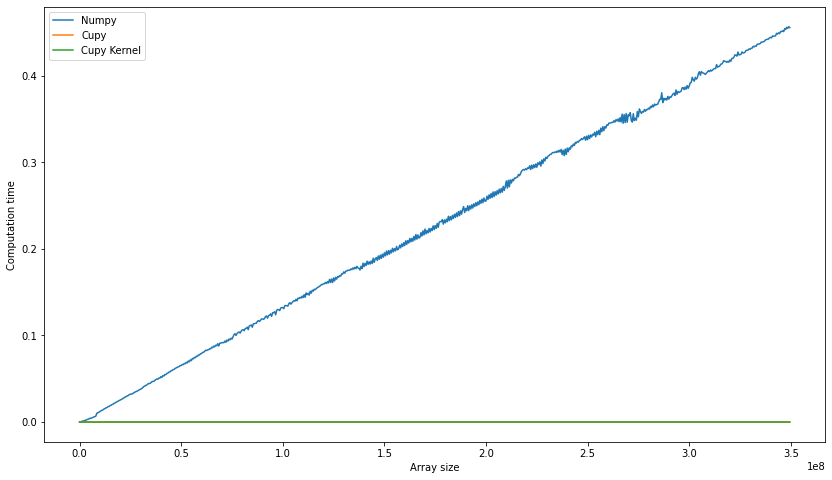

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(array_of_sizes, time_np, label='Numpy')
plt.plot(array_of_sizes, time_cp, label='Cupy')
plt.plot(array_of_sizes, time_cp_kernel, label='Cupy Kernel')
plt.legend()
plt.xlabel('Array size')
plt.ylabel('Computation time')

Text(0, 0.5, 'Computation time')

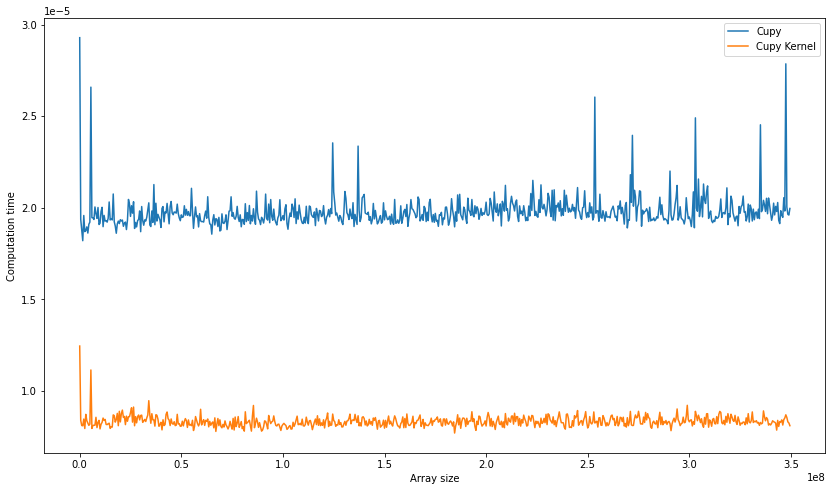

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(array_of_sizes, time_cp, label='Cupy')
plt.plot(array_of_sizes, time_cp_kernel, label='Cupy Kernel')
plt.legend()
plt.xlabel('Array size')
plt.ylabel('Computation time')